# Linear Regression - Scikit-Learn

## Data Simulation
> Sample size is $n=10000$.  
> $x=N(0,1)$, $u=N(0,1)$, $y=2x-1+u$.    
> $y$ and $x$ are positively correlated.  

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
rng = np.random.RandomState(42)

x = rng.randn(10000) 
x.shape

(10000,)

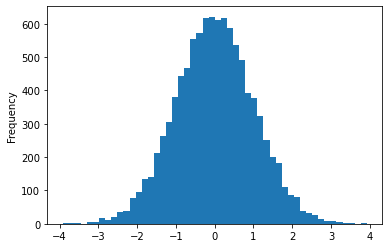

In [2]:
import pandas as pd
pd.Series(x).plot.hist(bins=50);

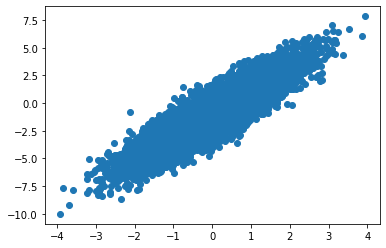

In [3]:
y = 2 * x - 1 + rng.randn(10000)
plt.scatter(x, y);

## Sckikit Learn
> The Python module **sklearn.linear_model** contains a function **LinearRegression**.  
> Including intercept **fit_intercept=True** is default.    
> Steps:
> 0. Import **sklearn.linear_model** module.  
> 1. Regressors $X$ needs to have 2 dimensions; $y$ can be 1 dimension.  
> 2. Initialize a model using ```model=LinearRegression()```.  
> 3. Estimate the model using **model.fit(x,y)**.  
> 4. Slope and intercept can be called out using **model.coef_** and **model.intercept_**.  
> 5. Calculate fitted values using **model.predict(newdata)**.  

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
# Model Specification

model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [6]:
# Modify X data structure (to matrix) to fit into sklearn

X = x[:, np.newaxis]
X.shape
X

array([[ 0.49671415],
       [-0.1382643 ],
       [ 0.64768854],
       ...,
       [-0.70531672],
       [ 0.49576557],
       [ 0.64438845]])

In [7]:
# Estimation (Note: X followed by y)

model.fit(X, y)

LinearRegression()

In [8]:
# Results are stored in model
print(round(model.intercept_,4))
print(model.coef_[0])

-0.9865
1.9914674619045203


In [9]:
# Generate the fitted line using the estimates

xfit = np.linspace(-4, 4, 100)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

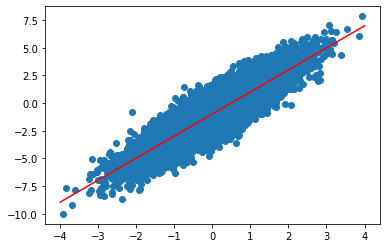

In [10]:
# Data Visualization

plt.scatter(x, y)
plt.plot(xfit, yfit, color='red');

## Training/ Testing Sample
> Python module: **sklearn.model_selection**.  
> Method: **train_test_split**.    
> **train_test_split(x,y,random_state=seed)** splits data $n$ into $75%$ and $25%$ group by default following the random rule ```random_state=seed```.  
> Different split can be specified as **train_size=size**.  

In [11]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=2)

print(Xtrain.shape)
print(Xtest.shape)

(7500, 1)
(2500, 1)


In [12]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, 
                                                train_size=8000, test_size= 2000, 
                                                random_state=2)
print(Xtrain.shape)
print(Xtest.shape)

(8000, 1)
(2000, 1)


In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, 
                                                train_size=0.8, test_size= 0.2, 
                                                random_state=2)
print(Xtrain.shape)
print(Xtest.shape)

(8000, 1)
(2000, 1)


In [14]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=2019)

ypred = model.predict(Xtest)

In [15]:
df = pd.DataFrame({'Actual': ytest, 'Predicted': ypred})

df.head()

,Actual,Predicted
0,-2.499761,-2.934668
1,1.859734,0.452245
2,-1.051919,-0.960591
3,-1.133199,-0.510032
4,-0.322499,-1.830669


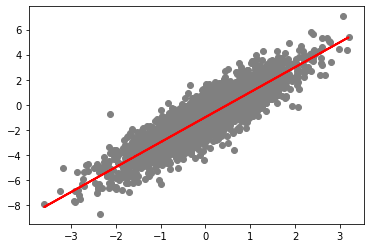

In [16]:
# Data Visualization

plt.scatter(Xtest, ytest, color='gray')
plt.plot(Xtest, ypred, color='red', lw=2);

## Evaluation
> Python module: **sklearn.metrics**.  
> Methods: **r2_score**, **mean_absolute_error** and **mean_squared_error**.  
> **accuracy_score(ytest, ypred)** where ```ytest``` is the actual testing data; ```ypred``` is the model fitted values.  

In [17]:
r_sq = model.score(X,y)
print(round(r_sq,4))

0.7994


In [18]:
# Training Samples
from sklearn.metrics import r2_score

yfit = model.predict(Xtrain)
print(round(r2_score(ytrain,yfit),4))

0.7992


In [19]:
# Testing Samples 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(round(r2_score(ytest,ypred),4))
print(round(mean_absolute_error(ytest,ypred),4))
print(round(mean_squared_error(ytest,ypred),4))

0.8002
0.7976
0.9925


## Activity 1
> Load the data 'wage1.csv'.  
> Split the data into training (train_size=400) and (test_size=126).  
> Carry out the linear regression of $wage$ against $educ$, $exper$, $nonwhite$ and $female$.    
> Report the coefficients (intercept and slope), and R2.   
> Put them into a pd.DataFrame and print it out.  

In [20]:
import pandas as pd
import numpy as np

df = pd.read_excel('wage1.xls')
df.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [21]:
y = df['wage']
X = df[['educ','exper','nonwhite','female']]

In [22]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, 
                                                train_size=400, test_size=126,
                                                random_state=2019)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True).fit(Xtrain,ytrain)

out = np.hstack([model.intercept_,model.coef_,model.score(Xtrain,ytrain)]).round(decimals=4)
tab = pd.DataFrame(out, columns = ['value'],
                   index=['intercept','educ','exper','nonwhite','female','Rsq'])
tab

,value
intercept,-1.3259
educ,0.5703
exper,0.0568
nonwhite,-0.1196
female,-2.0190
Rsq,0.2802
